In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [3]:
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')


In [4]:
train_data.shape

(60000, 785)

In [5]:
test_data.shape

(10000, 785)

In [6]:
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [7]:
x_train = train_data.iloc[:,1:].to_numpy()
x_train = x_train.reshape([-1,28,28,1])
x_train = x_train/255

y_train = train_data.iloc[:,0].to_numpy()

# y = data.iloc[:, 2].to_numpy()         # Extract the 3rd column (label) → index 2
# x = data.drop(data.columns[2], axis=1).to_numpy()  # Drop the 3rd column and keep the rest as input features

In [8]:
x_test = test_data.iloc[:,1:].to_numpy()
x_test = x_test.reshape([-1,28,28,1])
x_test = x_test/255

y_test = test_data.iloc[:,0].to_numpy()

In [9]:


model = Sequential()

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,769,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,771,594 (10.57 MB)

 Trainable params: 2,771,594 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 127s 66ms/step - accuracy: 0.8257 - loss: 0.4916
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 123s 66ms/step - accuracy: 0.9029 - loss: 0.2614
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 106s 56ms/step - accuracy: 0.9215 - loss: 0.2141
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 105s 56ms/step - accuracy: 0.9323 - loss: 0.1790
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 116s 62ms/step - accuracy: 0.9442 - loss: 0.1514


In [11]:
metrics = model.evaluate(x_test, y_test)
print(metrics)
print(f"Accuracy : {metrics[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9159 - loss: 0.2446
[0.23907919228076935, 0.9203000068664551]
Accuracy : 92.03%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Predicted: Trousers
Actual: Trousers
Correct 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Predicted: T-shirt
Actual: T-shirt
Correct 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted: Ankel Boot
Actual: Ankel Boot
Correct 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted: Trousers
Actual: Trousers
Correct 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Predicted: Bag
Actual: Bag
Correct 


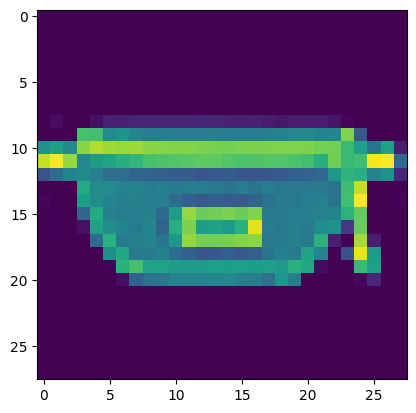

In [12]:
class_labels = ['T-shirt', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankel Boot']

for i in range(5):
    image_index = 1352+i
    prediction = model.predict(x_test[image_index:image_index+1])
    y_pred = np.argmax(prediction)
    y_actual = y_test[image_index]
    print(f"Predicted: {class_labels[y_pred]}")
    print(f"Actual: {class_labels[y_actual]}")
    if(y_pred == y_actual):
        print("Correct ")
    else:
        print("Wrong")
    plt.imshow(x_test[image_index:image_index+1][0])
    



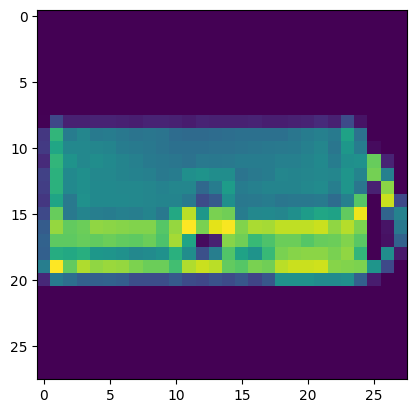

In [13]:
plt.imshow(x_test[image_index+1:image_index+2][0])


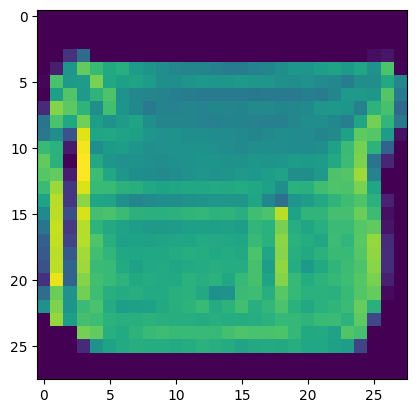

In [14]:
plt.imshow(x_test[image_index+2:image_index+3][0])